# EDA Template

### https://yzpt.github.io/module_pandas_B2/

### Effectuer une analyse exploratoire de données (EDA) sur un jeu de données de votre choix en respectant les attendus ci-dessous.

<hr>

## Attendus de l'EDA sur le fichier [data/clients_v2.csv](data/clients_v2.csv)

## https://yzpt.github.io/module_pandas_B2/data/clients_v2.csv

### Maîtriser la manipulation de données avec Pandas 
* lecture /écriture de fichiers CSV, Excel 
* sélection de colonne(s)/ligne(s)
* filtrage
* tri
* groupement

### Nettoyer un jeu de données 
* valeurs manquantes : 
  - identification
  - suppression
  - imputation (fillna)
* doublons:
  - identification
  - suppression

### Calculer et interpréter des statistiques descriptives avec Pandas
* Sélectionner une ou plusieurs colonnes pertinente(s) puis:
  - calculer la moyenne
  - calculer la médiane
  - calculer l'écart-type, la variance
  - calculer le min, le max

### Explorer et analyser les relations entre plusieurs variables:
* Sélectionner les colonnes quantitatives
  
* /!\  -----   **Encoder les colonnes qualitatives**   -----  /!\
  
* créer une matrice de corrélation :
  - avec la methode de Peason
  - avec la méthode de Spearman
  - Détecter les corrélations fortes
* Effectuer une analyse bi-variée (scatterplot) sur une ou plusieurs variables corréllées
* réaliser une régression linéaire simple sur une variable dépendante et une variable indépendante
* Effectuer une prédiction sur cette régression linéaire



In [3]:
### Comprendre comment identifier et traiter les outliers (valeurs aberrantes) avec Python 
# * méthode des z-scores
# * IQR
# * Box-plot

In [15]:
# Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## Lecture/écriture de fichiers CSV, JSON, Excel

In [ ]:
# Importation de la bibliothèque pandas
import pandas as pd

# ----------------------------------------
# 1. LECTURE DES FICHIERS CSV (.csv)
# ----------------------------------------

# Lecture de base d'un fichier CSV
df_csv = pd.read_csv("data.csv")
print("Lecture de base du fichier CSV :")
print(df_csv.head())

# Lecture de CSV avec options :
# - Délimiteur personnalisé (par exemple, point-virgule)
# - Lecture de colonnes spécifiques
# - Spécification des types de données
df_csv_options = pd.read_csv(
    "data.csv",
    delimiter=";",
    usecols=["colonne1", "colonne2"],
    dtype={"colonne1": int}
)
print("Lecture de CSV avec options :")
print(df_csv_options.head())

In [ ]:
# ----------------------------------------
# 2. ÉCRITURE DES FICHIERS CSV
# ----------------------------------------

# Écriture de base dans un fichier CSV
df_csv.to_csv("sortie_base.csv", index=False)

# Écriture de CSV avec options :
# - Délimiteur personnalisé
# - Colonnes sélectionnées
# - Ajout des données à un fichier existant
df_csv.to_csv(
    "sortie_options.csv",
    index=False,
    sep=";",
    columns=["colonne1", "colonne2"],
    mode="a"
)

print("Les fichiers CSV ont été écrits avec succès.")

In [ ]:
# ----------------------------------------
# 3. LECTURE DES FICHIERS JSON (.json)
# ----------------------------------------

# Lecture de base d'un fichier JSON
df_json = pd.read_json("data.json")
print("Lecture de base du fichier JSON :")
print(df_json.head())

# Lecture de JSON avec options :
# - Orientation (par exemple, 'records')
# - Lecture de JSON délimité par ligne
df_json_options = pd.read_json("data.json", orient="records", lines=True)
print("Lecture de JSON avec options :")
print(df_json_options.head())

In [ ]:
# ----------------------------------------
# 4. ÉCRITURE DES FICHIERS JSON
# ----------------------------------------

# Écriture de base dans un fichier JSON
df_json.to_json("sortie_base.json", orient="records")

# Écriture de JSON avec options :
# - Formatage indenté pour une meilleure lisibilité
# - JSON délimité par ligne
# - Compression (par exemple, gzip)
df_json.to_json(
    "sortie_options.json",
    orient="records",
    lines=True,
    indent=4
)
df_json.to_json("sortie_compressée.json.gz", orient="records", lines=True, compression="gzip")

print("Les fichiers JSON ont été écrits avec succès.")

In [ ]:
# ----------------------------------------
# 5. LECTURE DES FICHIERS EXCEL (.xlsx)
# ----------------------------------------

# Lecture de base d'un fichier Excel
df_excel = pd.read_excel("data.xlsx")
print("Lecture de base du fichier Excel :")
print(df_excel.head())

# Lecture d'Excel avec options :
# - Nom de la feuille spécifié
# - Colonnes spécifiques
# - Types de données définis
df_excel_options = pd.read_excel(
    "data.xlsx",
    sheet_name="Feuille1",
    usecols=["Colonne1", "Colonne2"],
    dtype={"Colonne1": int}
)
print("Lecture d'Excel avec options :")
print(df_excel_options.head())

# Lecture de toutes les feuilles dans un dictionnaire de DataFrames
excel_data = pd.read_excel("data.xlsx", sheet_name=None)
print("Toutes les feuilles lues :")
print(excel_data.keys())

# Accès à une feuille spécifique
df_specific_sheet = excel_data["Feuille2"]
print("Données de 'Feuille2' :")
print(df_specific_sheet.head())

In [ ]:
# ----------------------------------------
# 6. ÉCRITURE DES FICHIERS EXCEL (.xlsx)
# ----------------------------------------

# Écriture de base dans un fichier Excel
df_excel.to_excel("sortie_base.xlsx", index=False)

# Écriture avec options :
# - Nom de la feuille
# - Colonnes spécifiques
df_excel.to_excel(
    "sortie_options.xlsx",
    index=False,
    sheet_name="FeuillePersonnalisée",
    columns=["Colonne1", "Colonne2"]
)

# Écriture de plusieurs DataFrames dans des feuilles différentes
with pd.ExcelWriter("sortie_multi_feuilles.xlsx") as writer:
    df_excel.to_excel(writer, sheet_name="Feuille1", index=False)
    df_excel_options.to_excel(writer, sheet_name="Feuille2", index=False)

print("Les fichiers Excel ont été écrits avec succès.")

In [ ]:
# ----------------------------------------
# 7. OPTIONS SUPPLÉMENTAIRES
# ----------------------------------------

# Gestion des valeurs manquantes lors de la lecture de CSV ou Excel
df_missing_values = pd.read_csv(
    "data_avec_manquants.csv",
    na_values=["NA", "n/a"]
)
print("Données CSV avec valeurs manquantes personnalisées :")
print(df_missing_values.head())

# Analyse des colonnes de dates
df_parsed_dates = pd.read_excel("data_avec_dates.xlsx", parse_dates=["ColonneDate"])
print("Données Excel avec colonnes de dates analysées :")
print(df_parsed_dates.head())

# Lecture de fichier Excel protégé par mot de passe
df_protected = pd.read_excel("data_protégée.xlsx", engine="openpyxl", password="votremotdepasse")
print("Lecture d'un fichier Excel protégé par mot de passe :")
print(df_protected.head())

# Exploration des données

In [ ]:
# Importation de la bibliothèque pandas
import pandas as pd

# Chargement d'un dataset exemple (fichier CSV)
df = pd.read_csv("data.csv")

# ----------------------------------------
# 1. INFORMATION GÉNÉRALE SUR LE DATASET
# ----------------------------------------

# Affichage des informations générales sur le dataset (colonnes, types, valeurs manquantes)
df.info()

# Résumé statistique des colonnes numériques (moyenne, écart-type, min, max, etc.)
print("Résumé statistique des colonnes numériques :")
print(df.describe())

# Aperçu des premières lignes du dataset (par défaut : 5 premières lignes)
print("Aperçu des premières lignes :")
print(df.head())

# Aperçu des dernières lignes du dataset
print("Aperçu des dernières lignes :")
print(df.tail())

# Liste des colonnes du dataset
print("Liste des colonnes :")
print(df.columns)

# Nombre de lignes et de colonnes
print("Dimensions du dataset (lignes, colonnes) :")
print(df.shape)

In [ ]:
# ----------------------------------------
# 2. EXPLORATION VISUELLE DES DONNÉES
# ----------------------------------------

# Affichage de l'histogramme des colonnes numériques
print("Histogramme des colonnes numériques :")
df.hist(figsize=(10, 6))

# Affichage de la distribution d'une colonne spécifique
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 4))
df["ColonneCible"].hist(bins=30, alpha=0.7, color="blue")
plt.title("Distribution de la colonne 'ColonneCible'")
plt.xlabel("Valeurs")
plt.ylabel("Fréquence")
plt.show()

## Valeurs manquantes

In [ ]:
# Création d'un DataFrame
data = {
    'Nom': ['Alice', 'Bob', 'Charlie', 'David', 'Eve', 'Frank', 'John', 'Hannah', np.nan],
    'Age': [25, np.nan, 35, 45, 29, 33, 40, np.nan, np.nan],
    'Ville': ['Paris', 'Lyon', np.nan, 'Marseille', 'Lille', 'Bordeaux', 'Nice', 'Toulouse', np.nan],
    'Revenu': [50000, 52000, np.nan, 58000, 47000, np.nan, 53000, 49000, np.nan],
    'Score de Satisfaction': [8.5, np.nan, 7.0, 6.5, 9.0, 8.0, np.nan, 7.5, np.nan],
    'id': [423, 424, 425, np.nan, 427, 428, 429, 430, np.nan],
    'date_inscr': ['2024-05-01', '2024-01-23', '2024-02-12', '2024-03-01', '2024-04-15', '2024-06-01', '2024-07-01', '2024-08-01', np.nan]
}
df = pd.DataFrame(data)
df

,Nom,Age,Ville,Revenu,Score de Satisfaction,id,date_inscr
0,Alice,25.0,Paris,50000.0,8.5,423.0,2024-05-01
1,Bob,NaN,Lyon,52000.0,NaN,424.0,2024-01-23
2,Charlie,35.0,NaN,NaN,7.0,425.0,2024-02-12
3,David,45.0,Marseille,58000.0,6.5,NaN,2024-03-01
4,Eve,29.0,Lille,47000.0,9.0,427.0,2024-04-15
5,Frank,33.0,Bordeaux,NaN,8.0,428.0,2024-06-01
6,John,40.0,Nice,53000.0,NaN,429.0,2024-07-01
7,Hannah,NaN,Toulouse,49000.0,7.5,430.0,2024-08-01
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Détecter les valeurs manquantes
print("Valeurs manquantes :")
df.isnull()

Valeurs manquantes :


,Nom,Age,Ville,Revenu,Score de Satisfaction,id,date_inscr
0,False,False,False,False,False,False,False
1,False,True,False,False,True,False,False
2,False,False,True,True,False,False,False
3,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False
5,False,False,False,True,False,False,False
6,False,False,False,False,True,False,False
7,False,True,False,False,False,False,False
8,True,True,True,True,True,True,True


## dropna() : Supprimer les lignes ou colonnes avec des valeurs manquantes
La méthode dropna() permet de supprimer les lignes ou colonnes contenant des valeurs manquantes (NaN). Elle est très flexible grâce à plusieurs paramètres.

### Options principales de dropna()
1. Suppression par ligne ou colonne : axis
* axis=0 : Supprime les lignes contenant des valeurs manquantes. (par défaut)
* axis=1 : Supprime les colonnes contenant des valeurs manquantes.


In [ ]:
df_dropped = df.dropna()  # Supprime les lignes avec au moins un NaN
print("Après suppression des lignes contenant des NaN :")
df_dropped


Après suppression des lignes contenant des NaN :


,Nom,Age,Ville,Revenu,Score de Satisfaction,id,date_inscr
0,Alice,25.0,Paris,50000.0,8.5,423.0,2024-05-01
4,Eve,29.0,Lille,47000.0,9.0,427.0,2024-04-15


In [ ]:
df_dropped_cols = df.dropna(axis=1)  # Supprime les colonnes avec des NaN
print("\nAprès suppression des colonnes contenant des NaN :")
df_dropped_cols


Après suppression des colonnes contenant des NaN :


""
0
1
2
3
4
5
6
7
8



2. Seuil de tolérance : thresh
* Supprime les lignes/colonnes uniquement si le nombre de valeurs non manquantes est inférieur à un certain seuil.
* Exemple : thresh=2 conserve les lignes/colonnes ayant au moins 2 valeurs non manquantes.

In [ ]:
df_thresh = df.dropna(thresh=2)  # Conserve les lignes avec au moins 2 valeurs non manquantes
print("\nAprès application d'un seuil :")
df_thresh


Après application d'un seuil :


,Nom,Age,Ville,Revenu,Score de Satisfaction,id,date_inscr
0,Alice,25.0,Paris,50000.0,8.5,423.0,2024-05-01
1,Bob,NaN,Lyon,52000.0,NaN,424.0,2024-01-23
2,Charlie,35.0,NaN,NaN,7.0,425.0,2024-02-12
3,David,45.0,Marseille,58000.0,6.5,NaN,2024-03-01
4,Eve,29.0,Lille,47000.0,9.0,427.0,2024-04-15
5,Frank,33.0,Bordeaux,NaN,8.0,428.0,2024-06-01
6,John,40.0,Nice,53000.0,NaN,429.0,2024-07-01
7,Hannah,NaN,Toulouse,49000.0,7.5,430.0,2024-08-01


3. Sur un sous-ensemble de colonnes : subset
* Applique dropna() uniquement à un groupe spécifique de colonnes, sans affecter les autres.

In [ ]:
df_subset = df.dropna(subset=['Age', 'Revenu'])  # Supprime uniquement si NaN dans Age ou Revenu
print("\nAprès suppression conditionnelle sur un sous-ensemble de colonnes :")
df_subset


Après suppression conditionnelle sur un sous-ensemble de colonnes :


,Nom,Age,Ville,Revenu,Score de Satisfaction,id,date_inscr
0,Alice,25.0,Paris,50000.0,8.5,423.0,2024-05-01
3,David,45.0,Marseille,58000.0,6.5,NaN,2024-03-01
4,Eve,29.0,Lille,47000.0,9.0,427.0,2024-04-15
6,John,40.0,Nice,53000.0,NaN,429.0,2024-07-01



4. Supprimer seulement si toutes les valeurs sont manquantes : how
* how='any' (par défaut) : Supprime si une ou plusieurs valeurs sont manquantes.
* how='all' : Supprime uniquement si toutes les valeurs sont manquantes.

In [ ]:
df_all = df.dropna(how='all')  # Supprime les lignes où toutes les colonnes sont NaN
print("\nAprès suppression des lignes avec uniquement des NaN :")
df_all


Après suppression des lignes avec uniquement des NaN :


,Nom,Age,Ville,Revenu,Score de Satisfaction,id,date_inscr
0,Alice,25.0,Paris,50000.0,8.5,423.0,2024-05-01
1,Bob,NaN,Lyon,52000.0,NaN,424.0,2024-01-23
2,Charlie,35.0,NaN,NaN,7.0,425.0,2024-02-12
3,David,45.0,Marseille,58000.0,6.5,NaN,2024-03-01
4,Eve,29.0,Lille,47000.0,9.0,427.0,2024-04-15
5,Frank,33.0,Bordeaux,NaN,8.0,428.0,2024-06-01
6,John,40.0,Nice,53000.0,NaN,429.0,2024-07-01
7,Hannah,NaN,Toulouse,49000.0,7.5,430.0,2024-08-01


# Remplir les valeurs manquantes


In [ ]:
df['Age'] = df['Age'].fillna(df['Age'].mean())  # Remplir avec la moyenne
df['Revenu'] = df['Revenu'].fillna(df['Revenu'].median())  # Remplir avec la médiane
df['id'] = df['id'].ffill()  # Remplir en utilisant la méthode forward fill

print("Après avoir rempli les valeurs manquantes :")
df

Après avoir rempli les valeurs manquantes :


,Nom,Age,Ville,Revenu,Score de Satisfaction,id,date_inscr
0,Alice,25.0,Paris,50000.0,8.5,423.0,2024-05-01
1,Bob,34.5,Lyon,52000.0,NaN,424.0,2024-01-23
2,Charlie,35.0,NaN,51000.0,7.0,425.0,2024-02-12
3,David,45.0,Marseille,58000.0,6.5,425.0,2024-03-01
4,Eve,29.0,Lille,47000.0,9.0,427.0,2024-04-15
5,Frank,33.0,Bordeaux,51000.0,8.0,428.0,2024-06-01
6,John,40.0,Nice,53000.0,NaN,429.0,2024-07-01
7,Hannah,34.5,Toulouse,49000.0,7.5,430.0,2024-08-01
8,NaN,34.5,NaN,51000.0,NaN,430.0,NaN


In [ ]:
# Remplir avec une custom function
df['Ville'] = df['Ville'].fillna('Inconnu')
df

,Nom,Age,Ville,Revenu,Score de Satisfaction,id,date_inscr
0,Alice,25.0,Paris,50000.0,8.5,423.0,2024-05-01
1,Bob,34.5,Lyon,52000.0,NaN,424.0,2024-01-23
2,Charlie,35.0,Inconnu,51000.0,7.0,425.0,2024-02-12
3,David,45.0,Marseille,58000.0,6.5,425.0,2024-03-01
4,Eve,29.0,Lille,47000.0,9.0,427.0,2024-04-15
5,Frank,33.0,Bordeaux,51000.0,8.0,428.0,2024-06-01
6,John,40.0,Nice,53000.0,NaN,429.0,2024-07-01
7,Hannah,34.5,Toulouse,49000.0,7.5,430.0,2024-08-01
8,NaN,34.5,Inconnu,51000.0,NaN,430.0,NaN


In [ ]:
# Convert date column to datetime
df['date_inscr'] = pd.to_datetime(df['date_inscr'])

In [ ]:
# ----------------------------------------
# 3. SÉLECTION ET FILTRAGE DES DONNÉES
# ----------------------------------------

# Sélection d'une colonne spécifique
colonne_specifique = df["ColonneCible"]
print("Colonne spécifique sélectionnée :")
print(colonne_specifique.head())

# Sélection de plusieurs colonnes
colonnes_specifiques = df[["Colonne1", "Colonne2"]]
print("Colonnes spécifiques sélectionnées :")
print(colonnes_specifiques.head())

# Filtrage des lignes selon une condition (par exemple, valeurs > 50 dans une colonne)
filtrage = df[df["ColonneCible"] > 50]
print("Lignes filtrées (ColonneCible > 50) :")
print(filtrage.head())

# Filtrage selon plusieurs conditions (par exemple, valeurs > 50 et une autre colonne == "A")
filtrage_multi = df[(df["ColonneCible"] > 50) & (df["AutreColonne"] == "A")]
print("Lignes filtrées avec conditions multiples :")
print(filtrage_multi.head())

In [ ]:
# ----------------------------------------
# 4. TRI DES DONNÉES
# ----------------------------------------

# Tri des données par une colonne spécifique (croissant)
tri_croissant = df.sort_values(by="ColonneCible")
print("Données triées par 'ColonneCible' (croissant) :")
print(tri_croissant.head())

# Tri des données par une colonne spécifique (décroissant)
tri_decroissant = df.sort_values(by="ColonneCible", ascending=False)
print("Données triées par 'ColonneCible' (décroissant) :")
print(tri_decroissant.head())

# Tri par plusieurs colonnes
tri_multiple = df.sort_values(by=["Colonne1", "Colonne2"], ascending=[True, False])
print("nnées triées par 'Colonne1' (croissant) et 'Colonne2' (décroissant) :")
print(tri_multiple.head())

In [ ]:
# ----------------------------------------
# 5. ANALYSE STATISTIQUE D'UNE COLONNE
# ----------------------------------------

# Moyenne, médiane et écart-type
print("Moyenne de 'ColonneCible' :")
print(df["ColonneCible"].mean())

print("Médiane de 'ColonneCible' :")
print(df["ColonneCible"].median())

print("Écart-type de 'ColonneCible' :")
print(df["ColonneCible"].std())

# Distribution des valeurs (comptage par catégorie, si applicable)
distribution = df["ColonneCible"].value_counts()
print("Distribution des valeurs de 'ColonneCible' :")
print(distribution)

# Analyse de la dispersion (minimum, maximum, quantiles)
print("Dispersion de 'ColonneCible' :")
print(f"Min : {df['ColonneCible'].min()}")
print(f"Max : {df['ColonneCible'].max()}")
print(f"Quantiles :{df['ColonneCible'].quantile([0.25, 0.5, 0.75])}")

# Groupement

In [ ]:
# ----------------------------------------
# ANALYSE DES DONNÉES AVEC GROUPBY
# ----------------------------------------

# 1. Grouper les données par une colonne (par exemple, "Catégorie") et calculer des agrégations
grouped = df.groupby("Catégorie")  # Regroupement par la colonne "Catégorie"
print("\nGroupement par 'Catégorie' :")
print(grouped)

# Affichage des tailles de chaque groupe
print("\nTaille des groupes :")
print(grouped.size())

# 2. Calculer une somme par groupe
somme_par_groupe = grouped["Valeur"].sum()  # Remplacez "Valeur" par votre colonne numérique
print("\nSomme par groupe :")
print(somme_par_groupe)

# 3. Calculer la moyenne par groupe
moyenne_par_groupe = grouped["Valeur"].mean()
print("\nMoyenne par groupe :")
print(moyenne_par_groupe)

# 4. Appliquer plusieurs statistiques à une colonne
stats_par_groupe = grouped["Valeur"].agg(["mean", "sum", "min", "max"])
print("\nStatistiques par groupe :")
print(stats_par_groupe)

# 5. Grouper par plusieurs colonnes
groupe_multiple = df.groupby(["Catégorie", "SousCatégorie"])
somme_multiple = groupe_multiple["Valeur"].sum()
print("\nSomme par groupe avec plusieurs colonnes :")
print(somme_multiple)

# 6. Appliquer une fonction personnalisée
def ecart_interquartile(serie):
    return serie.quantile(0.75) - serie.quantile(0.25)

stats_personnalisees = grouped["Valeur"].agg(
    moyenne="mean", somme="sum", ecart_interquartile=ecart_interquartile
)
print("\nStatistiques personnalisées :")
print(stats_personnalisees)

# 7. Itérer sur les groupes (accès à chaque groupe individuellement)
print("\nAccès à chaque groupe :")
for nom, groupe in grouped:
    print(f"\nGroupe : {nom}")
    print(groupe)

# Exploration et relations entre variables


In [10]:
df = pd.read_csv("data/gapminder.csv")

Le coefficient de corrélation de Pearson et celui de Spearman sont deux mesures différentes de la corrélation entre deux variables, et ils sont adaptés à des types d'analyses distinctes.

## Coefficient de corrélation de Pearson
- Nature : Mesure linéaire.
- Utilisation : Évalue la force et la direction d'une relation linéaire entre deux variables quantitatives.
- Hypothèse : Suppose que les données sont normalement distribuées et que la relation entre les variables est linéaire.
- Valeur : Entre -1 (corrélation négative parfaite) et 1 (corrélation positive parfaite).
- Sensibilité : Très sensible aux valeurs aberrantes.

![image.png](images/pearson_example.png)

In [11]:
pearson_corr = df['gdpPercap'].corr(df['lifeExp'], method='pearson')
print(f"Coefficient de corrélation de Pearson entre PIB et espérance de vie : {pearson_corr:.2f}")

Coefficient de corrélation de Pearson entre PIB et espérance de vie : 0.58


- La relation entre le PIB et l'espérance de vie est modérément positive. Cela signifie qu'une augmentation du PIB est associée à une augmentation de l'espérance de vie, mais la relation n'est pas strictement linéaire.
  
- Limitation : 
  Cette valeur relativement basse (comparée à Spearman) indique que des variations ou des anomalies dans les données (par exemple, des pays avec un PIB élevé mais une faible espérance de vie) peuvent affaiblir la corrélation linéaire.

## Coefficient de corrélation de Spearman
- Nature : Basé sur les rangs.
- Utilisation : Mesure la force et la direction d'une relation monotone (croissante ou décroissante), qu'elle soit linéaire ou non.
- Hypothèse : Aucune hypothèse stricte sur la distribution ou la linéarité des données.
- Valeur : Entre -1 et 1, tout comme Pearson.
- Sensibilité : Moins sensible aux valeurs aberrantes car il utilise les rangs des données plutôt que leurs valeurs absolues.

In [12]:
# b) Corrélation de Spearman
spearman_corr = df['gdpPercap'].corr(df['lifeExp'], method='spearman')
print(f"Coefficient de corrélation de Spearman entre PIB et espérance de vie : {spearman_corr:.2f}")

Coefficient de corrélation de Spearman entre PIB et espérance de vie : 0.83


- La relation entre le PIB et l'espérance de vie est fortement monotone. Cela signifie que lorsque le PIB augmente, l'espérance de vie tend à augmenter également, même si la relation n'est pas nécessairement linéaire.

- Avantage de Spearman : En se basant sur les rangs (et non sur les valeurs exactes), ce coefficient est moins influencé par les valeurs aberrantes ou des cas particuliers.

## Interprétation globale

- **Non-linéarité :** Une différence importante entre les deux coefficients (comme ici) suggère que la relation entre le PIB et l'espérance de vie est probablement non-linéaire. Par exemple, une augmentation du PIB pourrait avoir un impact important sur l'espérance de vie dans les pays à faible PIB, mais un effet moins marqué dans les pays riches.

- **Impact des valeurs aberrantes :** Le coefficient de Pearson est probablement affecté par des valeurs extrêmes ou des outliers dans les données (comme des pays riches avec une faible espérance de vie ou vice-versa), tandis que Spearman capture mieux la tendance générale.


![image-2.png](images/pearson_spearman_comp.png)

## Matrice de corrélation

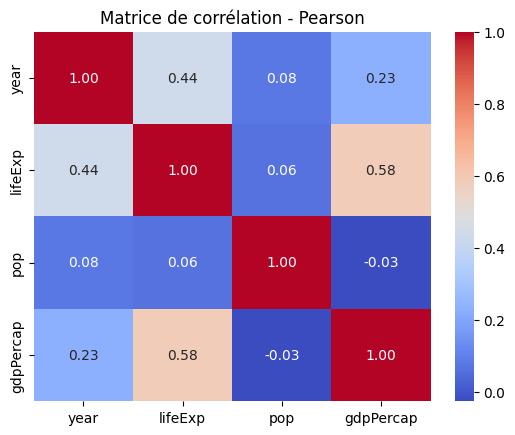

In [13]:
corr_matrix = df[['year', 'lifeExp', 'pop', 'gdpPercap']].corr(method='pearson')
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de corrélation - Pearson")
plt.show()

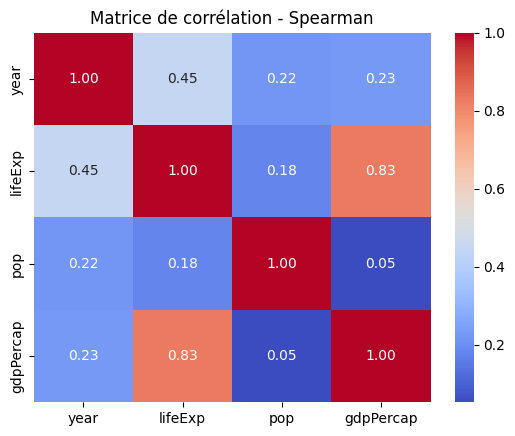

In [14]:
corr_matrix = df[['year', 'lifeExp', 'pop', 'gdpPercap']].corr(method='spearman')
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de corrélation - Spearman")
plt.show()

## Avec subplots :

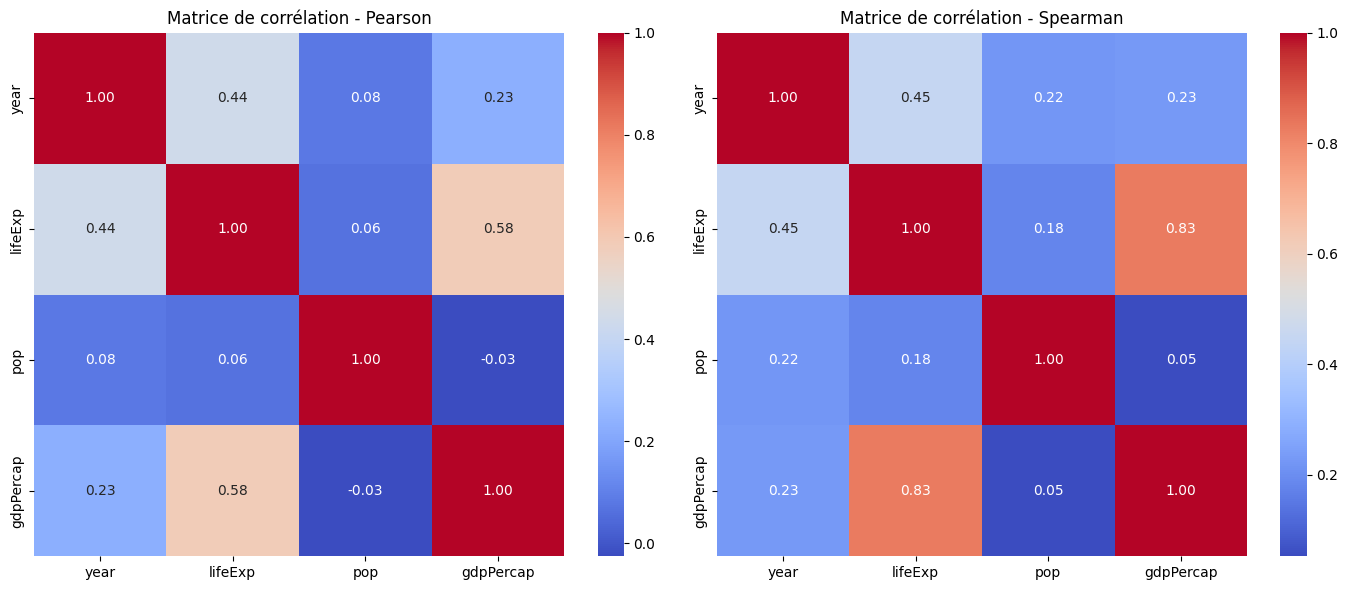

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Pearson correlation matrix
corr_matrix_pearson = df[['year', 'lifeExp', 'pop', 'gdpPercap']].corr(method='pearson')
sns.heatmap(corr_matrix_pearson, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[0])
axes[0].set_title("Matrice de corrélation - Pearson")

# Spearman correlation matrix
corr_matrix_spearman = df[['year', 'lifeExp', 'pop', 'gdpPercap']].corr(method='spearman')
sns.heatmap(corr_matrix_spearman, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[1])
axes[1].set_title("Matrice de corrélation - Spearman")

# Adjust layout
plt.tight_layout()
plt.show()

## Scatter matrix

In [16]:
import plotly.express as px

# filtered_df = df[df['continent'] == 'Europe']
# filtered_df = df[df['country'] == 'Honduras']
# filtered_df = filtered_df[['year', 'lifeExp', 'pop', 'gdpPercap']]

filtered_df = df[['year', 'lifeExp', 'pop', 'gdpPercap']]
fig = px.scatter_matrix(filtered_df)
# fig = px.scatter_matrix(df[df['year'] == 2007][['continent', 'year', 'lifeExp', 'pop', 'gdpPercap']], color='continent')
fig.show()

## Analyse bi-variée

In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

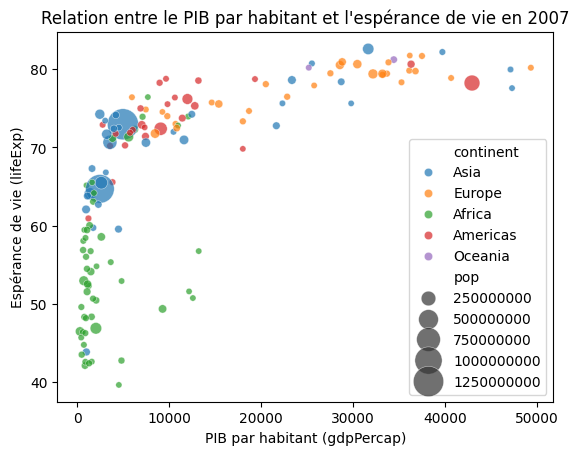

In [ ]:
# Visualisation de la relation entre le PIB par habitant et l'espérance de vie en 2007
sns.scatterplot(data=df[df['year'] == 2007], x='gdpPercap', y='lifeExp', hue='continent', alpha=0.7, size='pop', sizes=(20, 500))
# sns.scatterplot(data=df, x='gdpPercap', y='lifeExp', hue='continent', alpha=0.7, size='pop', sizes=(20, 500))
plt.title("Relation entre le PIB par habitant et l'espérance de vie en 2007")
plt.xlabel("PIB par habitant (gdpPercap)")
plt.ylabel("Espérance de vie (lifeExp)")
plt.show()

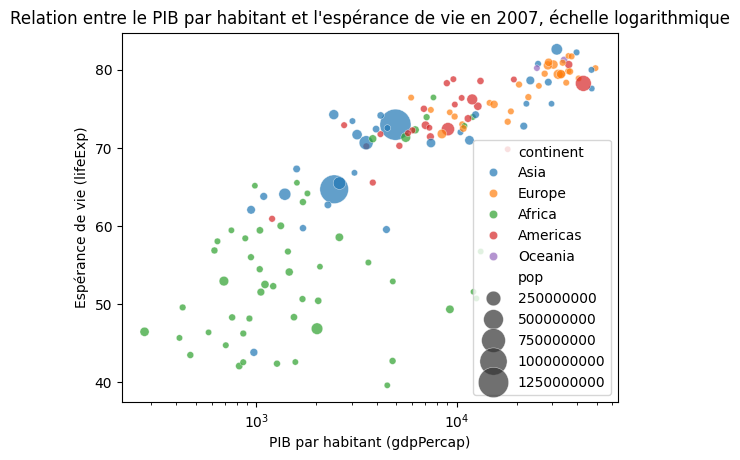

In [ ]:
# Application d'une échelle logarithmique
sns.scatterplot(data=df[df['year'] == 2007], x='gdpPercap', y='lifeExp', hue='continent', alpha=0.7, size='pop', sizes=(20, 500))
plt.xscale('log')
plt.title("Relation entre le PIB par habitant et l'espérance de vie en 2007, échelle logarithmique")
plt.xlabel("PIB par habitant (gdpPercap)")
plt.ylabel("Espérance de vie (lifeExp)")
plt.show()

## Encoder les colonnes qualitatives

In [1]:
import pandas as pd
df_clients = pd.read_csv("data/clients_v2.csv")

In [5]:
import pandas as pd

# One-hot encoding for OrderMethod
order_method_encoded = pd.get_dummies(df_clients['OrderMethod'], prefix='OrderMethod')

# Combine with the original dataframe
data_with_encoded_order_method = pd.concat([df_clients, order_method_encoded], axis=1)
data_with_encoded_order_method

,ClientID,Age,AnnualIncome,PurchaseAmount,PurchaseFrequency,CustomerSatisfaction,Region,Ville,Latitude,Longitude,Population,Altitude,DiscountApplied,OrderMethod,PaymentMethod,ShippingCost,OrderMethod_In-store,OrderMethod_Mobile App,OrderMethod_Online
0,Client_5187,43.0,17794.395400,1468.132354,0.883475,1.585582,Cantal,Vieillespesse,45.127,3.152,251.0,1023.0,False,Online,PayPal,14.901314,False,False,True
1,Client_33039,39.0,12340.486257,288.867670,0.885654,0.543795,Vienne,Pouançay,47.081,-0.073,233.0,54.0,False,Online,PayPal,5.933829,False,False,True
2,Client_26776,39.0,21228.799179,552.326729,2.148963,5.538682,Haut-Rhin,Kingersheim,47.790,7.334,13178.0,235.0,False,In-store,Credit Card,18.380911,True,False,False
3,Client_9910,40.0,33779.871216,633.672472,1.207567,2.305551,Eure-et-Loir,Abondant,48.785,1.440,2427.0,132.0,True,In-store,Bank Transfer,12.529953,True,False,False
4,Client_5550,63.0,22640.184363,328.579391,2.883312,3.556367,Charente,Vindelle,45.720,0.121,1062.0,55.0,True,Online,Credit Card,17.512980,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False
1017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False
1018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False
1019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False


In [7]:
data_with_encoded_order_method.columns

Index(['ClientID', 'Age', 'AnnualIncome', 'PurchaseAmount',
       'PurchaseFrequency', 'CustomerSatisfaction', 'Region', 'Ville',
       'Latitude', 'Longitude', 'Population', 'Altitude', 'DiscountApplied',
       'OrderMethod', 'PaymentMethod', 'ShippingCost', 'OrderMethod_In-store',
       'OrderMethod_Mobile App', 'OrderMethod_Online'],
      dtype='object')

## Consigne : 
* Nettoyer le dataset au regard du subset de colonnes suivant : 
  - 'ClientID', 'Age', 'OrderMethod'

In [8]:
data_with_encoded_order_method.head()

,ClientID,Age,AnnualIncome,PurchaseAmount,PurchaseFrequency,CustomerSatisfaction,Region,Ville,Latitude,Longitude,Population,Altitude,DiscountApplied,OrderMethod,PaymentMethod,ShippingCost,OrderMethod_In-store,OrderMethod_Mobile App,OrderMethod_Online
0,Client_5187,43.0,17794.395400,1468.132354,0.883475,1.585582,Cantal,Vieillespesse,45.127,3.152,251.0,1023.0,False,Online,PayPal,14.901314,False,False,True
1,Client_33039,39.0,12340.486257,288.867670,0.885654,0.543795,Vienne,Pouançay,47.081,-0.073,233.0,54.0,False,Online,PayPal,5.933829,False,False,True
2,Client_26776,39.0,21228.799179,552.326729,2.148963,5.538682,Haut-Rhin,Kingersheim,47.790,7.334,13178.0,235.0,False,In-store,Credit Card,18.380911,True,False,False
3,Client_9910,40.0,33779.871216,633.672472,1.207567,2.305551,Eure-et-Loir,Abondant,48.785,1.440,2427.0,132.0,True,In-store,Bank Transfer,12.529953,True,False,False
4,Client_5550,63.0,22640.184363,328.579391,2.883312,3.556367,Charente,Vindelle,45.720,0.121,1062.0,55.0,True,Online,Credit Card,17.512980,False,False,True


In [11]:
print(f'Nombre de lignes avant dropna subset (ClientID, Age, OrderMethod) :', data_with_encoded_order_method.shape[0])
# Supprime uniquement si NaN dans clientID, Age, OrderMethod
data_with_encoded_order_method = data_with_encoded_order_method.dropna(subset=['ClientID', 'Age', 'OrderMethod'])  
print(f'Nombre de lignes après dropna subset (ClientID, Age, OrderMethod) :', data_with_encoded_order_method.shape[0])

Nombre de lignes avant dropna subset (ClientID, Age, OrderMethod) : 1021
Nombre de lignes après dropna subset (ClientID, Age, OrderMethod) : 998


In [12]:
data_with_encoded_order_method.columns

Index(['ClientID', 'Age', 'AnnualIncome', 'PurchaseAmount',
       'PurchaseFrequency', 'CustomerSatisfaction', 'Region', 'Ville',
       'Latitude', 'Longitude', 'Population', 'Altitude', 'DiscountApplied',
       'OrderMethod', 'PaymentMethod', 'ShippingCost', 'OrderMethod_In-store',
       'OrderMethod_Mobile App', 'OrderMethod_Online'],
      dtype='object')

In [13]:
colonnes_quantitatives = [
    # 'ClientID', 
    'Age', 
    'AnnualIncome', 
    'PurchaseAmount',
    'PurchaseFrequency', 
    'CustomerSatisfaction', 
    # 'Region', 
    # 'Ville',
    'Latitude', 
    'Longitude', 
    'Population', 
    'Altitude', 
    # 'DiscountApplied',
    # 'OrderMethod', 
    # 'PaymentMethod', 
    'ShippingCost', 
    'OrderMethod_In-store',
    'OrderMethod_Mobile App', 
    'OrderMethod_Online']

## Calculer la matrice de corrélation, puis l'afficher avec une heatmap